# DEFINE GOOGLE COLAB FLAG!

In [1]:
isGoogleColab = False

In [2]:
if isGoogleColab:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    path_to_drive = "/content/drive/My Drive/Colab Notebooks/"
else:
    path_to_drive = "./"

In [4]:
import sys; print('Python:',sys.version)
import torch; print('Pytorch:',torch.__version__)
import fastai; print('Fastai:',fastai.__version__)

Python: 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
Pytorch: 1.7.1
Fastai: 2.2.7


# Load and Resize Images

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
import torch
from PIL import Image

C:\Users\bruno\miniconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


## Data

In [6]:
path = path_to_drive + 'dataset_v1_size350/' 
path_anno = path + 'gt/'
path_img = path + 'done/'

#funcao que pega a imagem de anotacoes correspondente, dado a imagem original de entrada
get_y_fn = lambda x : path_anno + '/' + f'{x.stem}_GT.png'

In [7]:
np.random.seed(2) #mesma semente para todas as vezes que executar

label_fnames = get_image_files(path_anno)
print(label_fnames[:3])
fnames = get_image_files(path_img)
print(fnames[:3])

[Path('dataset_v1_size512/gt/0_GT.png'), Path('dataset_v1_size512/gt/1004_GT.png'), Path('dataset_v1_size512/gt/1005_GT.png')]
[Path('dataset_v1_size512/done/0.jpg'), Path('dataset_v1_size512/done/1.jpg'), Path('dataset_v1_size512/done/10.jpg')]


In [8]:
sizeImage = (350,350)

In [9]:
#redimensiona todas as imagens e salva novamente
# CUIDADO PARA NAO REDIMENSIONAR AS IMAGENS ORIGINAIS ANOTADAS. SEMPRE REDIMENSIONAR UMA COPIA DELAS

for file in fnames:
    image = Image.open(file)
    print(file)
    image = image.resize(sizeImage, resample=Image.NEAREST)
    image.save(file)

for file in label_fnames:
    image = Image.open(file)
    print(file)
    image = image.resize(sizeImage, resample=Image.NEAREST)
    image.save(file)


'\nfor file in fnames:\n    image = Image.open(file)\n    print(file)\n    image = image.resize(sizeImage, resample=Image.NEAREST)\n    image.save(file)\n\nfor file in label_fnames:\n    image = Image.open(file)\n    print(file)\n    image = image.resize(sizeImage, resample=Image.NEAREST)\n    image.save(file)\n'

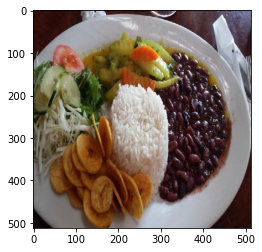

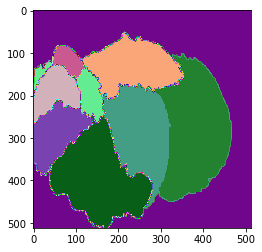

Ground truth Codes (array([  0,   3,   4,  65,  72,  81,  89,  93, 100], dtype=uint8), array([104951,  27038,  40783,   6499,   3575,  13479,  21457,   9200,
        35162], dtype=int64))


In [10]:
### VISUALIZACAO DA MÁSCARA FICA COM A BORDA ESTRANHA, MAS ELA ESTÁ CORRETA COMO PODE SER VISTO NOS CODIGOS DO GROUND TRUTH

idx = 100
cmap = matplotlib.colors.ListedColormap (np.random.rand(256,3))

img = Image.open(fnames[idx])
arr = np.asarray(img)
plt.imshow(arr)
plt.show()

img1 = Image.open(get_y_fn(fnames[idx]))
arr = np.asarray(img1)
plt.imshow(arr, cmap=cmap, vmin=0, vmax=255)
plt.show()
print("Ground truth Codes",np.unique(arr,return_counts=True))
